In [1]:
# Import all necessity functions for Machine Learning
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

# Download keras
!pip install keras

# Import all necessity functions for Neural Network
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

# Plotting the confusion matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
# Remove all warnings
import warnings
warnings.filterwarnings("ignore")

#####Import the dataset

In [3]:
import keras
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train shape # {} ".format(X_train.shape),'\n')
print("X_test shape  # {} ".format(X_test.shape),'\n')
print("y_train shape # {} ".format(y_train.shape),'\n')
print("y_test shape  # {} ".format(y_test.shape))

X_train shape # (60000, 28, 28)  

X_test shape  # (10000, 28, 28)  

y_train shape # (60000,)  

y_test shape  # (10000,) 


#####Display some of the dataset

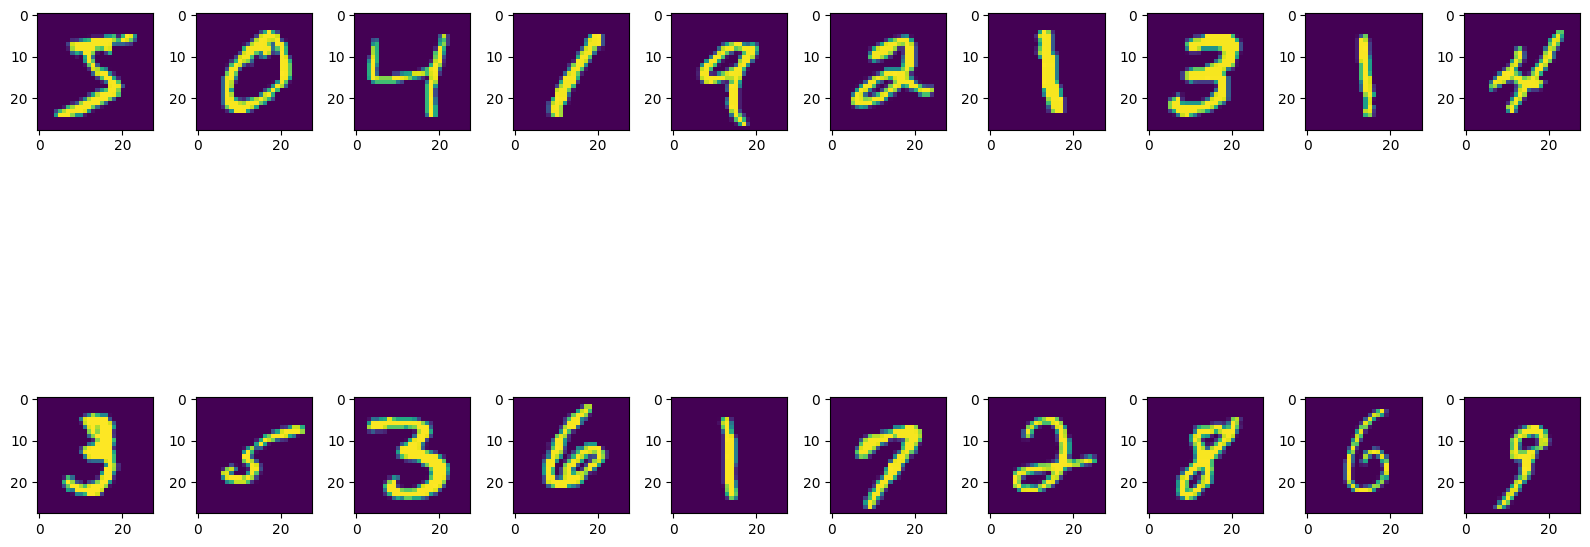

In [4]:
plt.figure(figsize = (16, 10))
for index, data in enumerate(X_train[0:20]):
  plt.subplot(2, 10, index + 1)
  plt.imshow(data)

plt.tight_layout()
plt.show()

#####Do the normalization

In [5]:
X_train = X_train/255
X_test  = X_test/255

print("Normalozation is completed.")

Normalozation is completed.


In [6]:
np.unique(y_test).shape[0]

10

#####Convert the data type into float with respect to PyTorch

In [7]:
import torch

X_train = np.expand_dims(X_train, 1)
X_train = torch.tensor(data = X_train, dtype = torch.float32)
y_train = torch.tensor(data = y_train, dtype = torch.float32)

X_test  = np.expand_dims(X_test, 1)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)
y_test  = torch.tensor(data = y_test, dtype = torch.float32)

#####Initialize the DataLoader with batch_size: 64

In [8]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

In [9]:
BATCH_SIZE = 128
train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

print("Batch size of Train # {} ".format(train_loader.batch_size),'\n')
print("Batch size of Test  # {} ".format(test_loader.batch_size),'\n')

train_data, train_label = next(iter(train_loader))
test_data, test_label   = next(iter(test_loader))

print("Train data shape with batch_size  # {} ".format(train_data.shape),'\n')
print("Train label shape with batch_size # {} ".format(train_label.shape),'\n')

print("Test data shape with batch_size   # {} ".format(test_data.shape),'\n')
print("Test label shape with batch_size  # {} ".format(test_label.shape))

Batch size of Train # 128  

Batch size of Test  # 128  

Train data shape with batch_size  # torch.Size([128, 1, 28, 28])  

Train label shape with batch_size # torch.Size([128])  

Test data shape with batch_size   # torch.Size([128, 1, 28, 28])  

Test label shape with batch_size  # torch.Size([128]) 


#####Model Building

In [12]:
"""
    Create a class named DigitClassifier that would take TWO parameters
        1. input_channel
        2. output_dimension

    Call the super function so that it will inherit all the necessity methods from the parent class
"""
class DigitClassifier(nn.Module):
  def __init__(self, input_channel = None, output_dimension = None):
    super().__init__()

    """
        Create a Sequential model that will take a couple of parameters like
            1. in_channels : Define wether it is RGB or Gray. RGB-3, Gray-1
            2. out_channels: Define the next neurons that defined with 64
            3. kernel_size : Define the output of feature map that is used to extract the low and high level features from the image
            4. stride : Defines the window movement while computing the feature map
            5. padding: padding defines whether the output feature's size would be equivalent to orginal or not

        Activation : ReLU, Defines whether the next neurons with respect to layer would be activated or not
        Pooling-Layer: Defined the down sampling the feature map
        Dropout Layer: Defined the overfitting
        Input-Shape  : (28 * 28) * 1
    """
    self.firstLayer = nn.Sequential(
        nn.Conv2d(in_channels = input_channel, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Dropout(p = 0.3)
    )

    """
        Create a Sequential model that will take a couple of parameters like
            1. in_channels : Define wether it is RGB or Gray. RGB-3, Gray-1
            2. out_channels: Define the next neurons that defined with 64
            3. kernel_size : Define the output of feature map that is used to extract the low and high level features from the image
            4. stride : Defines the window movement while computing the feature map
            5. padding: padding defines whether the output feature's size would be equivalent to orginal or not

        Activation : ReLU, Defines whether the next neurons with respect to layer would be activated or not
        Pooling-Layer: Defined the down sampling the feature map
        Dropout Layer: Defined the overfitting
        Input-Shape : (14 * 14) * 64
    """
    self.secondLayer = nn.Sequential(
        nn.Conv2d(in_channels = 64, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Dropout(p = 0.4)
    )

    """
    Input-Shape : (7 * 7) * 32
    Create a fully connected layer with a couple of parameters
    1. in_features: 7 * 7 * 32
    2. out_features : 128
    3. Activation : ReLU()
    4. Dropout-rate: 0.5
    """
    self.hiddenLayer1 = nn.Sequential(
        nn.Linear(in_features = 7 * 7 * 32, out_features = 128),
        nn.ReLU(),
        nn.Dropout(p = 0.5)
    )

    """
        Create the second hidden Layer
        1. in_features = 128
        2. out_features = 64
        3. Activation : ReLU
    """
    self.hiddenLayer2 = nn.Sequential(
        nn.Linear(in_features = 128, out_features = 64),
        nn.ReLU()
    )

    """
        Create the output layer with
        1. in_features = 64
        2. out_features = output_dimension
    """
    self.outputLayer = nn.Sequential(
        nn.Linear(in_features = 64, out_features = output_dimension),
        nn.Softmax()
    )

  def forward(self, x):
    """
        For the First Layer that would take independent Features
    """
    x = self.firstLayer(x)

    """
        For the Second Layer that will take x: Inpendent Features
    """
    x = self.secondLayer(x)

    """
        For the Flatten operation that would assist us to add neural networks
    """
    x = x.reshape(x.size(0), -1)

    """
        For the First hidden Layer
    """
    x = self.hiddenLayer1(x)

    """
        For the Second Hidden Layer
    """
    x = self.hiddenLayer2(x)

    """
        For the Output Layer
    """
    x = self.outputLayer(x)

    return x


In [14]:
# Call the model
try:
  model = DigitClassifier(input_channel = 1, output_dimension = 10)
except Exception as e:
  print(e.with_traceback())
else:
  print(model.parameters)

<bound method Module.parameters of DigitClassifier(
  (firstLayer): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.3, inplace=False)
  )
  (secondLayer): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.4, inplace=False)
  )
  (hiddenLayer1): Sequential(
    (0): Linear(in_features=1568, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (hiddenLayer2): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
  )
  (outputLayer): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)>


#####Define GPU

In [15]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
device

device(type='cuda')

In [16]:
# Add the model into GPU
model = model.to(device)

#####Summary the model

In [17]:
summary(model = model, input_size = X_train.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
              ReLU-2           [-1, 64, 28, 28]               0
         MaxPool2d-3           [-1, 64, 14, 14]               0
           Dropout-4           [-1, 64, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]          18,464
              ReLU-6           [-1, 32, 14, 14]               0
         MaxPool2d-7             [-1, 32, 7, 7]               0
           Dropout-8             [-1, 32, 7, 7]               0
            Linear-9                  [-1, 128]         200,832
             ReLU-10                  [-1, 128]               0
          Dropout-11                  [-1, 128]               0
           Linear-12                   [-1, 64]           8,256
             ReLU-13                   [-1, 64]               0
           Linear-14                   

In [18]:
LEARNING_RATE = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.AdamW(params = model.parameters(), lr = LEARNING_RATE)

#####Train the model

In [19]:
# Initialize some varibales
EPOCHS     = 50
TRAIN_LOSS = []
VAL_LOSS   = []
TRAIN_ACC  = []
VAL_ACC    = []

# Call the model train
model.train()

"""
    1. Run a loop with respect to EPOCHS

    2. Initialize some of the crucial variables
        1. total_train_loss: Define the total train loss with respect to epoch
        2. total_val_loss  : Define the total validation loss with respect to epoch
        3. train_predictions : Define the total train prediction with respect to epoch
        4. val_predictions : Define the total validation predictions with respect to epoch
        5. train_lables : Store all the train labels during batch size
        6. val_labels : Store all the validation labels duirng batch size

    3. Run a loop with respect to train_loader & extrac data and label
"""
#######################
#      Training       #
#######################

for epoch in range(EPOCHS):
  total_train_loss  = []
  total_val_loss    = []
  train_predictions = []
  val_predictions   = []
  train_labels      = []
  val_labels        = []

  for X_batch, y_batch in train_loader:
    y_batch = y_batch.long()
    # Connect GPU to X_batch & y_batch
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)
    # Do the prediction
    train_prediction = model(X_batch)
    train_loss = loss_function(train_prediction, y_batch)

    """
        1. Initialize the optimizer to adjust the weight and bias
        2. Do backward propagation with respect to train loss
        3. Do step operation with respect to optimizer
    """

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Checking CPU
    y_batch = y_batch.cpu()
    # Store the orginal train labels into train_labels
    train_labels.extend(y_batch.flatten().detach().numpy())

    # Store the train loss into train_loss
    total_train_loss.append(train_loss.item())

    # Store the predicted labels
    train_predictions.extend(torch.argmax(train_prediction.cpu(), 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into TRAIN_LOSS & TRAIN_ACC list after being completed Epoch
  """
  # Store the accuracy into TRAIN_ACCURACY
  TRAIN_ACC.append(accuracy_score(train_labels, train_predictions))

  # Store the train loss into TRAIN_LOSS
  TRAIN_LOSS.append(np.array(total_train_loss).mean())

  ########################
  #        Testing       #
  ########################
  model.eval()

  for val_data, val_label in test_loader:
    val_label = val_label.long()
    # Convert GPU
    val_data = val_data.to(device)
    val_label = val_label.to(device)
    # Do the prediction
    val_prediction = model(val_data)
    val_loss = loss_function(val_prediction, val_label)

    # Checking CPU
    val_label = val_label.cpu()
    # Store the orginal validation labels into val_labels
    val_labels.extend(val_label.flatten().detach().numpy())

    # Store the validation loss into total_val_loss
    total_val_loss.append(val_loss.item())

    # Store the validation prediction labels
    val_predictions.extend(torch.argmax(val_prediction.cpu(), 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into VAL_LOSS & VAL_ACC list after being completed Epoch
  """
  # Store the val loss into VAL_LOSS
  VAL_LOSS.append(np.array(total_val_loss).mean())

  # Store the validation accuracy into VAL_ACC
  VAL_ACC.append(accuracy_score(val_labels, val_predictions))

  ########################
  #       Display        #
  ########################

  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))

  print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}".format(train_loader.batch_size,\
                                                                                                             train_loader.batch_size,\
                                                                                                             np.array(total_train_loss).mean(),\
                                                                                                             accuracy_score(train_labels, train_predictions),\
                                                                                                             np.array(total_val_loss).mean(),\
                                                                                                             accuracy_score(val_labels, val_predictions)))

Epoch 1/50 
128/128 [=========================] loss: 1.6999340517434485 - accuracy: 0.7697166666666667 - val_loss: 1.5146035182325146 - val_accuracy: 0.9471
Epoch 2/50 
128/128 [=========================] loss: 1.4996962084699033 - accuracy: 0.9629166666666666 - val_loss: 1.4887926699239997 - val_accuracy: 0.9734
Epoch 3/50 
128/128 [=========================] loss: 1.4880089632737865 - accuracy: 0.9743833333333334 - val_loss: 1.4855705710906018 - val_accuracy: 0.9768
Epoch 4/50 
128/128 [=========================] loss: 1.4815991519610765 - accuracy: 0.98005 - val_loss: 1.4824650544154494 - val_accuracy: 0.98
Epoch 5/50 
128/128 [=========================] loss: 1.4787672084531804 - accuracy: 0.9829833333333333 - val_loss: 1.47802994824663 - val_accuracy: 0.9838
Epoch 6/50 
128/128 [=========================] loss: 1.4762039977604393 - accuracy: 0.9855666666666667 - val_loss: 1.4754968730709221 - val_accuracy: 0.9861
Epoch 7/50 
128/128 [=========================] loss: 1.47402200515

#####Display the loss & accuracy

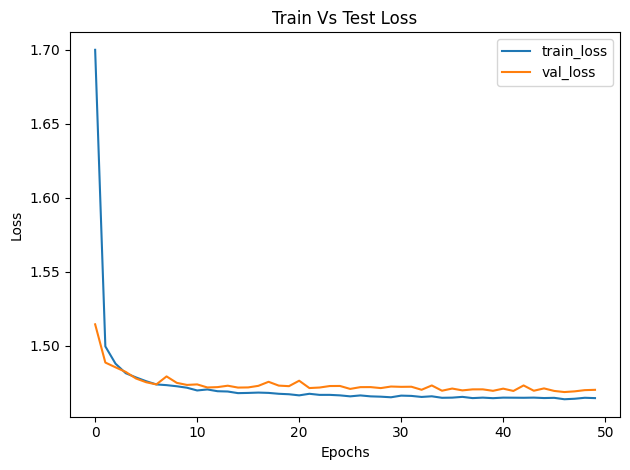

In [20]:
plt.plot(np.array(TRAIN_LOSS), label = 'train_loss')
plt.plot(np.array(VAL_LOSS), label = 'val_loss')
plt.title('Train Vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

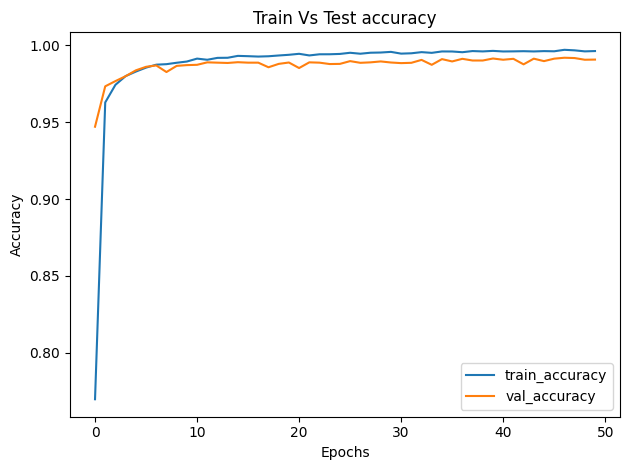

In [21]:
plt.plot(np.array(TRAIN_ACC), label = 'train_accuracy')
plt.plot(np.array(VAL_ACC), label = 'val_accuracy')
plt.title('Train Vs Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#####Evaluation the model performance

In [22]:
# Ealuation for training
predicted_value = []
actual_value    = []

for train_data, train_label in train_loader:
  # Convert the data and label into GPU
  train_data  = train_data.to(device)
  train_label = train_label.to(device)

  # Do the prediction
  predicted = model(train_data)

  # Store the train prediction and actual value
  predicted_value.extend(torch.argmax(predicted.cpu(), 1))
  actual_value.extend(train_label.cpu())

########################
#       Display        #
########################

print("ACCURACY  # {}".format(accuracy_score(actual_value, predicted_value)),'\n')
print("PRECISION # {}".format(precision_score(actual_value, predicted_value, average = 'macro')),'\n')
print("RECALL    # {}".format(recall_score(actual_value, predicted_value, average = 'macro')),'\n')
print("F1_SCORE  # {}".format(f1_score(actual_value, predicted_value, average = 'macro')))

ACCURACY  # 0.9958166666666667 

PRECISION # 0.995869300786184 

RECALL    # 0.9957369763700374 

F1_SCORE  # 0.9957963585024245


In [23]:
# Evaluation for testing
predicted_value = []
actual_value    = []
for test_data, test_label in test_loader:
  # Convert data and label into GPU
  test_data  = test_data.to(device)
  test_label = test_label.to(device)

  # Do the prediction
  predicted = model(test_data)

  # Store the test predicted value and actual value
  predicted_value.extend(torch.argmax(predicted, 1).cpu())
  actual_value.extend(test_label.cpu())

########################
#       Display        #
########################

print("ACCURACY  # {}".format(accuracy_score(actual_value, predicted_value)),'\n')
print("PRECISION # {}".format(precision_score(actual_value, predicted_value, average = 'macro')),'\n')
print("RECALL    # {}".format(recall_score(actual_value, predicted_value, average = 'macro')),'\n')
print("F1_SCORE  # {}".format(f1_score(actual_value, predicted_value, average = 'macro')))

ACCURACY  # 0.9908 

PRECISION # 0.9908883620501954 

RECALL    # 0.9906363205618746 

F1_SCORE  # 0.9907406439470249
